# About Dataset

## Context

You are a Data Scientist for a tourism company named "Lets Travel". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.
A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.
One of the ways to expand the customer base is to introduce a new offering of packages.
Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.
However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.
You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

## Objective

To predict which customer is more likely to purchase the newly introduced travel package

## About the Data

## Customer details:

CustomerID: Unique customer ID

ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)

Age: Age of customer

TypeofContact: How customer was contacted (Company Invited or Self Inquiry)

CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are 
ordered i.e. Tier 1 > Tier 2 > Tier 3

Occupation: Occupation of customer

Gender: Gender of customer

NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer

PreferredPropertyStar: Preferred hotel property rating by customer

MaritalStatus: Marital status of customer

NumberOfTrips: Average number of trips in a year by customer

Passport: The customer has a passport or not (0: No, 1: Yes)

OwnCar: Whether the customers own a car or not (0: No, 1: Yes)

NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer

Designation: Designation of the customer in the current organization

MonthlyIncome: Gross monthly income of the customer

## Libraries imported

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data gathering

In [5]:
df=pd.read_csv(r"C:\Users\Shanm\OneDrive\Desktop\tour_package.csv")
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [3]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

# Replacing null values with median in numerical columns

In [4]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Age'].isnull().sum()


0

In [5]:
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].median(),inplace=True)

df['NumberOfChildrenVisiting'].isnull().sum()


0

In [6]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(),inplace=True)

df['MonthlyIncome'].isnull().sum()

0

In [7]:
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].median(),inplace=True)

df['PreferredPropertyStar'].isnull().sum()

0

In [8]:
df['Gender'].unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [9]:
df['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

 Here i found the noise data which is (Fe Male) so i had replace with mode value

In [10]:
df['Gender']=df['Gender'].replace('Fe Male',np.nan)

In [11]:
df['Gender'].fillna(df['Gender'].mode())

0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
4883      Male
4884      Male
4885    Female
4886      Male
4887      Male
Name: Gender, Length: 4888, dtype: object

In [12]:
df['Gender'].value_counts()

Male      2916
Female    1817
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

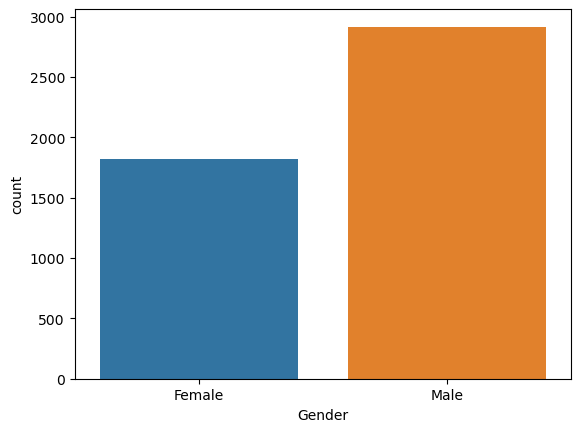

In [13]:
sns.countplot(data=df,x='Gender')

 From this count plot we can say that men are more travelling than females

<AxesSubplot:xlabel='CityTier', ylabel='count'>

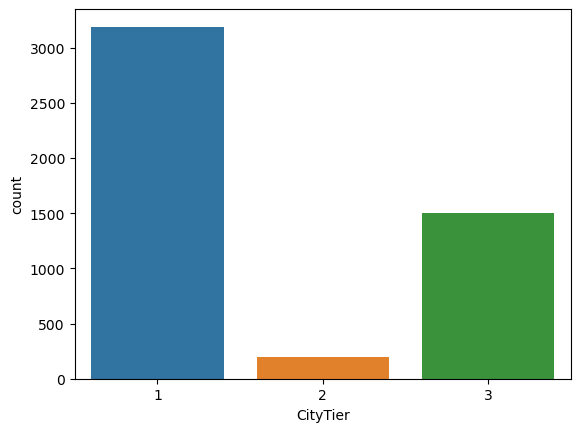

In [13]:
sns.countplot(data=df,x='CityTier')

 Citytier 1 are the more travellers compared to tier 2 and tier 3 cities

In [18]:
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


([<matplotlib.patches.Wedge at 0x20384a4b7f0>,
 [Text(-0.6692851422299538, 0.8729589900964595, "('Self Enquiry',)"),
  Text(0.6692851422299542, -0.8729589900964594, "('Company Invited',)")],
 [Text(-0.3650646230345202, 0.4761594491435233, '71%'),
  Text(0.3650646230345204, -0.47615944914352326, '29%')])

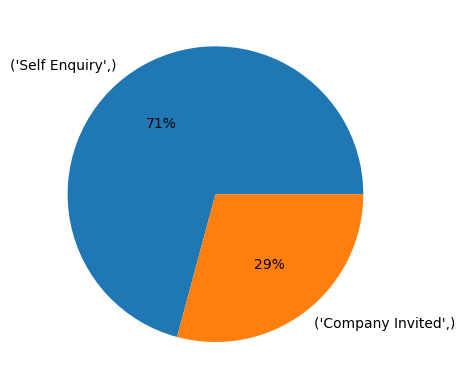

In [21]:
plt.pie(df[['TypeofContact']].value_counts(),labels=df[['TypeofContact']].value_counts().index,autopct='%0.0f%%')

  From this plot we can extract that self Enquiry is doing good in tourism according to this data

In [14]:
df['Gender'].value_counts()

Male      2916
Female    1817
Name: Gender, dtype: int64

# inputs and outputs

In [15]:
y=df['ProdTaken']

X=df[['Age','CityTier','Occupation','Gender','NumberOfPersonVisiting','PreferredPropertyStar','MaritalStatus','Passport','NumberOfChildrenVisiting','Designation','MonthlyIncome']]

 Here we are analyzing the target value and inputs as historical data given

In [16]:
X.head()

,Age,CityTier,Occupation,Gender,NumberOfPersonVisiting,PreferredPropertyStar,MaritalStatus,Passport,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,41.0,3,Salaried,Female,3,3.0,Single,1,0.0,Manager,20993.0
1,49.0,1,Salaried,Male,3,4.0,Divorced,0,2.0,Manager,20130.0
2,37.0,1,Free Lancer,Male,3,3.0,Single,1,0.0,Executive,17090.0
3,33.0,1,Salaried,Female,2,3.0,Divorced,1,1.0,Executive,17909.0
4,36.0,1,Small Business,Male,2,4.0,Divorced,0,0.0,Executive,18468.0


In [17]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: ProdTaken, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)

 We should split the data into two parts
 
 . train_data

 . test_data

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3910, 11)
(3910,)
(978, 11)
(978,)


In [20]:
X_train.head()

,Age,CityTier,Occupation,Gender,NumberOfPersonVisiting,PreferredPropertyStar,MaritalStatus,Passport,NumberOfChildrenVisiting,Designation,MonthlyIncome
2753,32.0,1,Large Business,Male,3,3.0,Divorced,1,2.0,Executive,23499.0
1262,43.0,1,Large Business,Male,2,3.0,Married,1,1.0,Executive,17437.0
542,38.0,1,Salaried,Female,2,3.0,Unmarried,1,1.0,Senior Manager,22861.0
3509,56.0,1,Salaried,Male,2,3.0,Divorced,1,1.0,Manager,22713.0
1056,28.0,3,Large Business,Male,3,3.0,Divorced,0,0.0,Executive,17909.0


In [21]:
X_train_num=X_train[['Age','CityTier','NumberOfPersonVisiting','PreferredPropertyStar','Passport','NumberOfChildrenVisiting','MonthlyIncome']]
X_train_num.head()

,Age,CityTier,NumberOfPersonVisiting,PreferredPropertyStar,Passport,NumberOfChildrenVisiting,MonthlyIncome
2753,32.0,1,3,3.0,1,2.0,23499.0
1262,43.0,1,2,3.0,1,1.0,17437.0
542,38.0,1,2,3.0,1,1.0,22861.0
3509,56.0,1,2,3.0,1,1.0,22713.0
1056,28.0,3,3,3.0,0,0.0,17909.0


X_train_num variable stored the numerical columns that the transformation will be done using normalization or standard transformation

In [22]:
X_train_cat=X_train.select_dtypes(include='object')

X_train_cat.head()

,Occupation,Gender,MaritalStatus,Designation
2753,Large Business,Male,Divorced,Executive
1262,Large Business,Male,Married,Executive
542,Salaried,Female,Unmarried,Senior Manager
3509,Salaried,Male,Divorced,Manager
1056,Large Business,Male,Divorced,Executive


X_train_cat variable stored the categorical columns that the transformation is done using One Hot Encoding or Label Encoding

In [23]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_num_trans=pd.DataFrame(scaler.fit_transform(X_train_num),
                              columns=X_train_num.columns,
                              index=X_train_num.index)

X_train_num_trans.head()


,Age,CityTier,NumberOfPersonVisiting,PreferredPropertyStar,Passport,NumberOfChildrenVisiting,MonthlyIncome
2753,-0.607995,-0.711858,0.133142,-0.725667,1.57339,0.960855,-0.006331
1262,0.602031,-0.711858,-1.244071,-0.725667,1.57339,-0.212823,-1.142555
542,0.052019,-0.711858,-1.244071,-0.725667,1.57339,-0.212823,-0.125914
3509,2.032062,-0.711858,-1.244071,-0.725667,1.57339,-0.212823,-0.153654
1056,-1.048005,1.472030,0.133142,-0.725667,-0.63557,-1.386500,-1.054086


For numerical data transformation i used StandardScaler method

In [24]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(drop='first',sparse=False)

X_train_cat_trans=pd.DataFrame(encoder.fit_transform(X_train_cat),
                              columns=encoder.get_feature_names_out(X_train_cat.columns),
                              index=X_train_cat.index)

X_train_cat_trans.head()

E:\Annaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,Gender_nan,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
2753,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1262,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
542,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3509,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1056,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


For categorical column i used One Hot Encoding for the transformation of data from categorical to numerical

In [25]:
X_train_transformed=pd.concat([X_train_num_trans,X_train_cat_trans],axis=1)


X_train_transformed.head()

,Age,CityTier,NumberOfPersonVisiting,PreferredPropertyStar,Passport,NumberOfChildrenVisiting,MonthlyIncome,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,Gender_nan,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
2753,-0.607995,-0.711858,0.133142,-0.725667,1.57339,0.960855,-0.006331,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1262,0.602031,-0.711858,-1.244071,-0.725667,1.57339,-0.212823,-1.142555,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
542,0.052019,-0.711858,-1.244071,-0.725667,1.57339,-0.212823,-0.125914,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3509,2.032062,-0.711858,-1.244071,-0.725667,1.57339,-0.212823,-0.153654,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1056,-1.048005,1.472030,0.133142,-0.725667,-0.63557,-1.386500,-1.054086,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In the X_train_transformed variable i concatenated X_train_num_trans and X_train_cat_trans for the final data numerical representation

In [26]:
X_test_num=X_test[['Age','CityTier','NumberOfPersonVisiting','PreferredPropertyStar','Passport','NumberOfChildrenVisiting','MonthlyIncome']]
X_test_num.head()

,Age,CityTier,NumberOfPersonVisiting,PreferredPropertyStar,Passport,NumberOfChildrenVisiting,MonthlyIncome
141,36.0,1,2,3.0,0,0.0,18452.0
3894,36.0,2,3,3.0,1,1.0,27515.0
1663,43.0,1,2,3.0,0,0.0,17089.0
2098,37.0,3,3,3.0,0,0.0,21334.0
4733,29.0,1,4,4.0,0,3.0,21879.0


As the X_test_num is a variable stored the numerical data columns

In [27]:
X_test_cat= X_test.select_dtypes(include='object')

X_test_cat.head()

,Occupation,Gender,MaritalStatus,Designation
141,Small Business,Male,Single,Executive
3894,Salaried,NaN,Unmarried,Senior Manager
1663,Small Business,Male,Married,Executive
2098,Small Business,Male,Married,Manager
4733,Salaried,Male,Married,Executive


Here the X_test_cat variables store the categorical data columns

In [28]:
X_test_num_trans =pd.DataFrame(scaler.transform(X_test_num),
                              columns=X_test_num.columns,
                              index=X_test_num.index)

X_test_num_trans.head()

,Age,CityTier,NumberOfPersonVisiting,PreferredPropertyStar,Passport,NumberOfChildrenVisiting,MonthlyIncome
141,-0.167986,-0.711858,-1.244071,-0.725667,-0.63557,-1.386500,-0.952310
3894,-0.167986,0.380086,0.133142,-0.725667,1.57339,-0.212823,0.746403
1663,0.602031,-0.711858,-1.244071,-0.725667,-0.63557,-1.386500,-1.207782
2098,-0.057983,1.472030,0.133142,-0.725667,-0.63557,-1.386500,-0.412126
4733,-0.938002,-0.711858,1.510356,0.528137,-0.63557,2.134532,-0.309974


In [29]:

X_test_cat_trans=pd.DataFrame(encoder.transform(X_test_cat),
                             columns=encoder.get_feature_names_out(X_test_cat.columns),
                             index=X_test_cat.index)

X_test_cat_trans.head()

,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,Gender_nan,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
141,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3894,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1663,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2098,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4733,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
X_test_transformed=pd.concat([X_test_num_trans,X_test_cat_trans],axis=1)

X_test_transformed.head()

,Age,CityTier,NumberOfPersonVisiting,PreferredPropertyStar,Passport,NumberOfChildrenVisiting,MonthlyIncome,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,Gender_nan,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
141,-0.167986,-0.711858,-1.244071,-0.725667,-0.63557,-1.386500,-0.952310,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3894,-0.167986,0.380086,0.133142,-0.725667,1.57339,-0.212823,0.746403,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1663,0.602031,-0.711858,-1.244071,-0.725667,-0.63557,-1.386500,-1.207782,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2098,-0.057983,1.472030,0.133142,-0.725667,-0.63557,-1.386500,-0.412126,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4733,-0.938002,-0.711858,1.510356,0.528137,-0.63557,2.134532,-0.309974,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
X_train_transformed.head()

,Age,CityTier,NumberOfPersonVisiting,PreferredPropertyStar,Passport,NumberOfChildrenVisiting,MonthlyIncome,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,Gender_nan,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
2753,-0.607995,-0.711858,0.133142,-0.725667,1.57339,0.960855,-0.006331,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1262,0.602031,-0.711858,-1.244071,-0.725667,1.57339,-0.212823,-1.142555,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
542,0.052019,-0.711858,-1.244071,-0.725667,1.57339,-0.212823,-0.125914,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3509,2.032062,-0.711858,-1.244071,-0.725667,1.57339,-0.212823,-0.153654,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1056,-1.048005,1.472030,0.133142,-0.725667,-0.63557,-1.386500,-1.054086,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
y

0       1
1       0
2       1
3       0
4       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4888, dtype: int64

## The algorithm which i used here is Logestic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()

classifier.fit(X_train_transformed,y_train)

LogisticRegression()

In [34]:
y_test_predict=classifier.predict(X_test_transformed)

In [35]:
from sklearn import metrics

metrics.accuracy_score(y_test,y_test_predict)

0.8415132924335378

## The model prediction score  I got while passing train and test data is 84 percentage

## The algorithm which is used here is Kneibors_classification

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [37]:
y_test_predict=classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test,y_test_predict)

0.83640081799591

## Here the model prediction is 83 percentage which is not that much greater than Logestic Regression

## The algorithm which is used here is Decision tree classifier¶

In [38]:
from sklearn.tree import DecisionTreeClassifier

classifier= DecisionTreeClassifier()

classifier.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [39]:
y_test_predict=classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test,y_test_predict)

0.8803680981595092

## The model prediction score is far better than Logestic Regression 

## Here i am using Random forest algorithm to see the better results

In [40]:
from sklearn.ensemble import RandomForestClassifier

classifier= RandomForestClassifier()

classifier.fit(X_train_transformed,y_train)

RandomForestClassifier()

In [41]:
y_test_predict=classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test,y_test_predict)

0.878323108384458

## The model prediction score is good but not like  Decision tree


# Conclusion

## By evaluating the algorithms i will consider that Logestic Regression model predicts good score with 0.8415132924335378 and Decision tree classifier predicted score with 0.8803680981595092 which is higher than Logestic Regression but not with the huge difference so we can go with the Logestic Regression Method